# **Face Recognition using Eigenfaces**
---




#### We will be using [FEI Face Database](https://fei.edu.br/~cet/facedatabase.html)  for our face recognition purpose. 
*Datasets consist of faces of 200 people and each person has two frontal images (one with a neutral expression and the other with a smiling facial expression), there are 400 full frontal face images manually registered and cropped.*
<br><br>**We will use normalized, equalized and cropped frontal face images.**


Add dataset in your Colab using:


```
!wget <link> 
```



Unzip your zip files using:
```
!unzip <name_of_your_zip_file>
```

In [1]:
# importing all the necessary packages 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

### Vectorization
We will use Python Imaging Library (PIL) to load images from files.
`PIL.Image.open()` Opens and identifies the given image file.`Note` Open into greyscale, or L(Luminance) mode: 

```
img = Image.open(f'{i}a.jpg').convert('L')  # i ranges from 1 to 200
img = img.resize((width, height),Image.ANTIALIAS) # for speed
```
Rearrange each Face image N x N into a column vector N<sup>2</sup> x 1. After Vectorization the shape of face matrix should be 200 x (width x height)





In [2]:
image_array=[]
for i in range(1,201):
    img = Image.open(f'/home/adhikari/100DT23/NaamiWinterSchool/Day2/Day2-feature_reprs/frontalimages_manuallyaligned_part1/{i}a.jpg').convert('L')  # i ranges from 1 to 200
    img = img.resize((50, 50),Image.ANTIALIAS)# for speed
    float_image=np.array(img)
    float_image=float_image.flatten()
    image_array.append(float_image)
    image_np_array=np.array(image_array)
    #imgplot = plt.imshow(img)
    #print(img.size)
    

In [3]:
# Check face_matrix.shape 
print(image_np_array.shape)

(200, 2500)


In [4]:
# Find mean_face
mean_face=np.mean(image_np_array,axis=0)
print(mean_face.shape)


(2500,)


Text(0.5, 1.0, 'Mean Face')

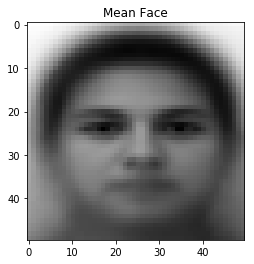

In [5]:
plt.imshow(mean_face.reshape(50,50),cmap='gray'); 
plt.title('Mean Face')



```
plt.imshow(mean_face.reshape(height,width),cmap='gray'); 
plt.title('Mean Face')
```

### Normalization


In [6]:
norm_matx=[]
for i in range(len(image_np_array)):
    diff=image_np_array[i]-mean_face
    norm_matx.append(diff)
    

In [7]:
#Perfrom Normalization
normmatrx_np_array=np.array(norm_matx)

In [15]:
print(normmatrx_np_array.shape)

(200, 2500)


In [8]:
matrx_transp=np.transpose(normmatrx_np_array)

In [9]:
# Calculate covariance matrix
#np.cov expects features as rows and observations as columns, so transpose
matrx_conv=np.cov(matrx_transp)

In [16]:
print(type(matrx_conv))

<class 'numpy.ndarray'>


In [11]:
#Find Eigen Vectors and Eigen Values, you can use SVD from np.linalg.svd
e,v,a=np.linalg.svd(matrx_conv)

In [12]:
e

array([[-7.78833915e-03, -4.69477209e-03,  8.48012068e-03, ...,
         5.16372770e-04, -2.47723684e-02,  7.25349650e-03],
       [-7.62731305e-03, -4.77747109e-03,  8.21960075e-03, ...,
         1.50936362e-03,  3.77101243e-02, -4.48356299e-03],
       [-8.05206696e-03, -4.66418559e-03,  8.96650789e-03, ...,
         1.34551901e-04,  1.69365770e-01,  1.88660111e-01],
       ...,
       [ 2.41774187e-02,  2.09383639e-02, -1.68110360e-02, ...,
        -9.25191953e-03, -2.92554176e-02,  8.21861120e-03],
       [ 2.64036578e-02,  2.03503125e-02, -1.60737810e-02, ...,
         7.70737270e-03, -3.62238287e-02,  2.62689878e-02],
       [ 2.61802015e-02,  2.25685713e-02, -1.65769039e-02, ...,
         7.86773341e-03,  5.77685244e-03, -2.29315291e-02]])

In [13]:
v

array([1.38720834e+06, 6.99560347e+05, 2.24217950e+05, ...,
       1.28576500e-10, 6.62801267e-11, 3.06621826e-11])

In [14]:
a

array([[-7.78833915e-03, -7.62731305e-03, -8.05206696e-03, ...,
         2.41774187e-02,  2.64036578e-02,  2.61802015e-02],
       [-4.69477209e-03, -4.77747109e-03, -4.66418559e-03, ...,
         2.09383639e-02,  2.03503125e-02,  2.25685713e-02],
       [ 8.48012068e-03,  8.21960075e-03,  8.96650789e-03, ...,
        -1.68110360e-02, -1.60737810e-02, -1.65769039e-02],
       ...,
       [ 0.00000000e+00, -1.18149509e-04,  6.20419504e-06, ...,
        -7.76979545e-03,  7.95024437e-03, -1.36432873e-02],
       [ 9.73630283e-01, -2.13185671e-02, -3.98138500e-02, ...,
        -1.74818352e-04,  7.22224382e-04,  2.44275537e-03],
       [ 0.00000000e+00, -4.93169643e-03,  8.78491331e-03, ...,
        -1.53032019e-02, -1.15311765e-03,  1.00594661e-03]])

In [ ]:

#Plot the first 10 Eigenfaces

fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = <eigen_vectors>[:,i].reshape(height,width)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)



In [ ]:
#Plot the first 10 Eigenfaces


Reconstruction with increasing Eigenfaces
```
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    # Get PC scores of the images (wights)
    # Reconstruct first face in dataset using k PCs (projected_face)
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(height,width)+mean_face.reshape(height,width),cmap='gray');
```



In [ ]:
# Reconstruct with increasing Eigenfaces